# Методы машинного обучения. 
## Лабораторная работа №6
### Анализ социологического исследования.
В Файле данные содержатся результат опроса населения о его условиях существования. Переменные разбиты на 2 класса - "Признаки состояния" - это субъективная оценка населения своего бытия и "Признаки причины" - объектные количественные признаки, оценивающие жизнедеятельность индивида и социума, в котором он проживает.
К признакам состояния относятся:

1.	Оценка благополучия
2.	Оценка социальной поддержки
3.	Ожидаемая продолжительность здоровой жизни
4.	Свобода граждан самостоятельно принимать жизненно важные решения
5.	Индекс Щедрости
6.	Индекс отношения к коррупции
7.	Оценка риска безработицы
8.	Индекс кредитного оптимизма
9.	Индекс страха социальных конфликтов
10.	Индекс семьи
11.	Индекс продовольственной безопасности
12.	Чувство технологического прогресса
13.	Чувство неравенства доходов в обществе

К индивидуальным признакам причины относятся:
1.	Среднегодовой доход, тыс. в долларах
2.	Объем потребленного алкоголя в год, л.
3.	Количество членов семьи
4.	Количество лет образования
5.	Доля от дохода семьи которая тратится на продовольствие, %

К общественным признакам причины относятся:
1.	Коэффициент Джини сообщества (Показатель степени расслоения общества по какому-либо социальному признаку. Одними из ключевых признаков, по которым рассчитывается коэффициент Джини, является уровень доходов и активов домохозяйств. Показатель может варьироваться в диапазоне от 0 до 1, и чем больше его значение, тем большее расслоение общества он отражает.)
2.	Издержки сообщества на окружающую среду, млн. долларов
3.	Охват беспроводной связи в сообществе, %
4.	Количество смертей от вирусных и респираторных заболеваний в сообществе, тыс. человек
5.	Волатильность потребительских цен в сообществе

Индивидуальные показатели характеризуют непосредственно индивида, общественные - сообщество в котором он проживает. В выборке могут присутствовать по несколько человек из одного сообщества. Все их общественные характеристики таким образом будут совпадать.
Также в данных присутствует интегральная характеристика удовлетворенности человека жизнью - для ее описания используется шкала Кантрила (см. рисунок 1)

Субъективные показатели качества жизни
Шкала Кантрила (The Cantril Scale) – простая визуальная шкала, которая позволяет оценить общую удовлетворенность жизнью.

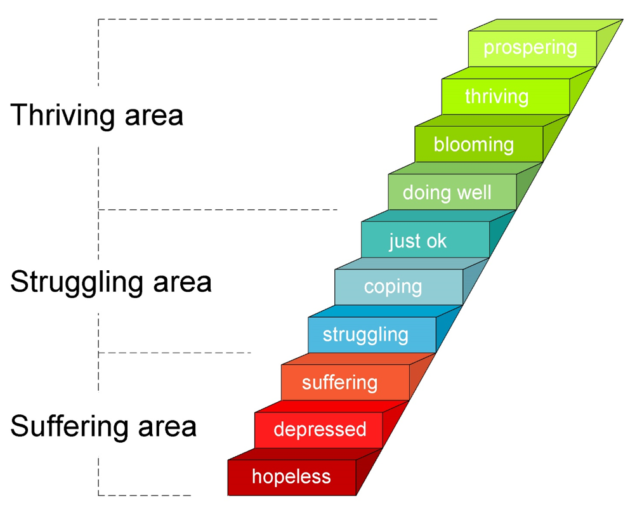
Рисунок 1. Шкала Кантрила.

Prospering – Процветающий/благоденствующий

Thriving – Преуспевающий

Blooming – Расцветающий

Doing well – Дела идут хорошо

Just Ok – Просто нормально

Coping – Справляющийся

Struggling – Столкнувшийся с трудностями/борющийся

Suffering – Страдающий

Depressed – Депрессивный

Hopeless – Безнадежный


Задание:

- Определить какие из признаков состояния наиболее сильно связаны с интегральной оценкой счастья (благополучия) респондента.
- Определить, как влияют признаки причины на наиболее важные признаки состояния.
- Пользуясь найденными закономерностями спрогнозировать попадание респондентов, у которых интегральная характеристика отмечена как "Неизвестно", в укрупненные группы шкалы Кантрила.

In [1]:
import pandas as pd

data = pd.read_excel("data/ЛР6_Полные_данные.xlsx", engine='openpyxl')  

In [2]:
data.head()

Респондент       Сообщество  Среднегодовой.доход,.тыс..$  \
0  Респондент 1  Сообщество  480                       21.350   
1  Респондент 2  Сообщество  130                      622.613   
2  Респондент 3  Сообщество  156                      400.896   
3  Респондент 4   Сообщество  69                      375.950   
4  Респондент 5  Сообщество  330                      925.782   

   Объем.потребленного.алкоголя.в.год,.л.  Количество.членов.семьи  \
0                                      62                        4   
1                                      30                        7   
2                                      45                        2   
3                                      56                        5   
4                                      39                        6   

   Количество.лет.образования  \
0                           5   
1                          21   
2                           8   
3                          10   
4                          18   

   Доля.от.дохода.семьи.которая.тратится.на.продовольствие,.%  \
0                                                 65            
1                                                 39            
2                                                 45            
3                                                 68            
4                                                 38            

   Коэффициент.Джини.сообщества  \
0                      0.608084   
1                      0.369140   
2                      0.345094   
3                      0.635868   
4                      0.787911   

   Издержки.сообщества.на.окружающую.среду,.млн..$  \
0                                           197.16   
1                                           297.10   
2                                           305.32   
3                                            78.78   
4                                            93.35   

   Охват.беспроводной.связи.в.сообществе,.%  ...  Индекс.Щедрости  \
0                                  0.330140  ...             67.0   
1                                  0.580329  ...             49.0   
2                                  0.624832  ...             19.0   
3                                  0.240157  ...             83.0   
4                                  0.229719  ...             76.0   

   Индекс.отношения.к.коррупции  Оценка.риска.безработицы  \
0                          69.0                      71.0   
1                          29.0                      36.0   
2                          73.0                      49.0   
3                          50.0                      67.0   
4                          62.0                      44.0   

   Индекс.кредитного.оптимизма  Индекс.страха.социальных.конфликтов  \
0                         38.0                                 92.0   
1                         66.0                                 31.0   
2                         61.0                                 19.0   
3                         35.0                                 77.0   
4                         40.0                                 86.0   

   Индекс.семьи  Индекс.продовольственной.безопасности  \
0          11.0                                   95.0   
1          49.0                                    3.0   
2          39.0                                   82.0   
3          28.0                                   50.0   
4          51.0                                   76.0   

   Чувство.технологического.прогресса  Чувство.неравенства.доходов.в.обществе  \
0                                16.0                                    14.0   
1                                72.0                                    60.0   
2                                38.0                                    60.0   
3                                33.0                                     1.0   
4                                64.0                                    55.0   

   Ощущаемое.счастье  

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 26 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   Респондент                                                                             36000 non-null  object 
 1   Сообщество                                                                             36000 non-null  object 
 2   Среднегодовой.доход,.тыс..$                                                            36000 non-null  float64
 3   Объем.потребленного.алкоголя.в.год,.л.                                                 36000 non-null  int64  
 4   Количество.членов.семьи                                                                36000 non-null  int64  
 5   Количество.лет.образования                                                

In [4]:
data.describe()

Среднегодовой.доход,.тыс..$  Объем.потребленного.алкоголя.в.год,.л.  \
count                 36000.000000                            36000.000000   
mean                    340.636416                               51.230806   
std                     268.118668                               12.218932   
min                       7.919000                               10.000000   
25%                     122.377750                               43.000000   
50%                     264.020500                               50.000000   
75%                     489.920250                               60.000000   
max                    1534.666000                               85.000000   

       Количество.членов.семьи  Количество.лет.образования  \
count             36000.000000                36000.000000   
mean                  4.948806                   13.692250   
std                   3.027117                    5.856553   
min                   1.000000                    0.000000   
25%                   2.000000                    9.000000   
50%                   4.000000                   13.000000   
75%                   7.000000                   19.000000   
max                  12.000000                   30.000000   

       Доля.от.дохода.семьи.которая.тратится.на.продовольствие,.%  \
count                                       36000.000000            
mean                                           48.251472            
std                                            13.008347            
min                                            20.000000            
25%                                            39.000000            
50%                                            47.000000            
75%                                            62.000000            
max                                            80.000000            

       Коэффициент.Джини.сообщества  \
count                  36000.000000   
mean                       0.572049   
std                        0.280250   
min                       -0.049854   
25%                        0.333659   
50%                        0.638293   
75%                        0.823651   
max                        1.012268   

       Издержки.сообщества.на.окружающую.среду,.млн..$  \
count                                     36000.000000   
mean                                        177.470434   
std                                         116.448698   
min                                           0.000000   
25%                                          66.300000   
50%                                         160.110000   
75%                                         301.130000   
max                                         400.000000   

       Охват.беспроводной.связи.в.сообществе,.%  \
count                              36000.000000   
mean                                   0.446942   
std                                    0.258823   
min                                    0.100000   
25%                                    0.202458   
50%                                    0.378335   
75%                                    0.691458   
max                                    0.950000   

       Количество.смертей.от.вирусных.и.респираторных.заболеваний.в.сообществе,.тыс..человек  \
count                                       36000.000000                                       
mean                                           12.365640                                       
std                                             9.071492                                       
min                                             0.000000                                       
25%                                             2.890000                                       
50%                                            12.200000                                       
75%                                            13.320000                                       
max                 

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Преобразование меток счастья в числовые значения
# Создание словаря соответствия категорий счастья числовым значениям
happiness_mapping = {
    'Prospering': 9,
    'Thriving': 8,
    'Blooming': 7,
    'Doing well': 6,
    'Just ok': 5,
    'Coping': 4,
    'Strugglng': 3,
    'Suffering': 2,
    'Depressed': 1,
    'Hopeless': 0,
    'Неизвестно': np.nan  # Заменяем "Неизвестно" на NaN
}

data['Ощущаемое.счастье'] = data['Ощущаемое.счастье'].map(happiness_mapping)

# Применение Label Encoding к признакам 'Респондент' и 'Сообщество'
label_encoder = LabelEncoder()
data['Респондент'] = label_encoder.fit_transform(data['Респондент'])
data['Сообщество'] = label_encoder.fit_transform(data['Сообщество'])

data

Респондент  Сообщество  Среднегодовой.доход,.тыс..$  \
0               0         423                       21.350   
1           11111          35                      622.613   
2           22222          63                      400.896   
3           29334         566                      375.950   
4           30445         257                      925.782   
...           ...         ...                          ...   
35995       28885         243                      412.715   
35996       28886         316                      373.757   
35997       28887         258                      374.882   
35998       28888         337                      412.314   
35999       28892         527                      264.142   

       Объем.потребленного.алкоголя.в.год,.л.  Количество.членов.семьи  \
0                                          62                        4   
1                                          30                        7   
2                                          45                        2   
3                                          56                        5   
4                                          39                        6   
...                                       ...                      ...   
35995                                      46                        3   
35996                                      48                        1   
35997                                      38                        1   
35998                                      51                        3   
35999                                      49                        1   

       Количество.лет.образования  \
0                               5   
1                              21   
2                               8   
3                              10   
4                              18   
...                           ...   
35995                          11   
35996                           8   
35997                          18   
35998                          12   
35999                          15   

       Доля.от.дохода.семьи.которая.тратится.на.продовольствие,.%  \
0                                                     65            
1                                                     39            
2                                                     45            
3                                                     68            
4                                                     38            
...                                                  ...            
35995                                                 50            
35996                                                 50            
35997                                                 39            
35998                                                 44            
35999                                                 45            

       Коэффициент.Джини.сообщества  \
0                          0.608084   
1                          0.369140   
2                          0.345094   
3                          0.635868   
4                          0.787911   
...                             ...   
35995                      0.921816   
35996                      0.620469   
35997                      0.498873   
35998                      0.663517   
35999                      0.561213   

       Издержки.сообщества.на.окружающую.среду,.млн..$  \
0                                               197.16   
1                                               297.10   
2                                               305.32   
3                                                78.78   
4                                                93.35   
...                                                ...   
35995                                            59.51   
35996                                           144.79   
35997                                           207.14   
35998                                           10

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 26 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   Респондент                                                                             36000 non-null  int32  
 1   Сообщество                                                                             36000 non-null  int32  
 2   Среднегодовой.доход,.тыс..$                                                            36000 non-null  float64
 3   Объем.потребленного.алкоголя.в.год,.л.                                                 36000 non-null  int64  
 4   Количество.членов.семьи                                                                36000 non-null  int64  
 5   Количество.лет.образования                                                

In [8]:
correlation_matrix = data.corr()
happiness_corr = correlation_matrix['Ощущаемое.счастье'].abs().sort_values(ascending=False)
print(happiness_corr)


Ощущаемое.счастье                                                                        1.000000
Чувство.технологического.прогресса                                                       0.913740
Оценка.социальной.поддержки                                                              0.894181
Оценка.риска.безработицы                                                                 0.837481
Индекс.семьи                                                                             0.802395
Количество.лет.образования                                                               0.781665
Индекс.кредитного.оптимизма                                                              0.779343
Доля.от.дохода.семьи.которая.тратится.на.продовольствие,.%                               0.724539
Объем.потребленного.алкоголя.в.год,.л.                                                   0.692459
Среднегодовой.доход,.тыс..$                                                              0.606202
Издержки.сообщества.

Признаки состояния наиболее сильно связаны с интегральной оценкой счастья (благополучия) респондента:
- Чувство.технологического.прогресса
- Оценка.социальной.поддержки
- Оценка.риска.безработицы
- Индекс.семьи
- Индекс.кредитного.оптимизма


In [11]:
features_state = ['Чувство.технологического.прогресса', 'Индекс.кредитного.оптимизма', 'Оценка.социальной.поддержки', 
                        'Оценка.риска.безработицы', 'Индекс.семьи']
features_cause = ['Коэффициент.Джини.сообщества', 'Издержки.сообщества.на.окружающую.среду,.млн..$', 
                            'Охват.беспроводной.связи.в.сообществе,.%', 'Количество.смертей.от.вирусных.и.респираторных.заболеваний.в.сообществе,.тыс..человек',
                           'Волатильность.потребительских.цен.в.сообществе']

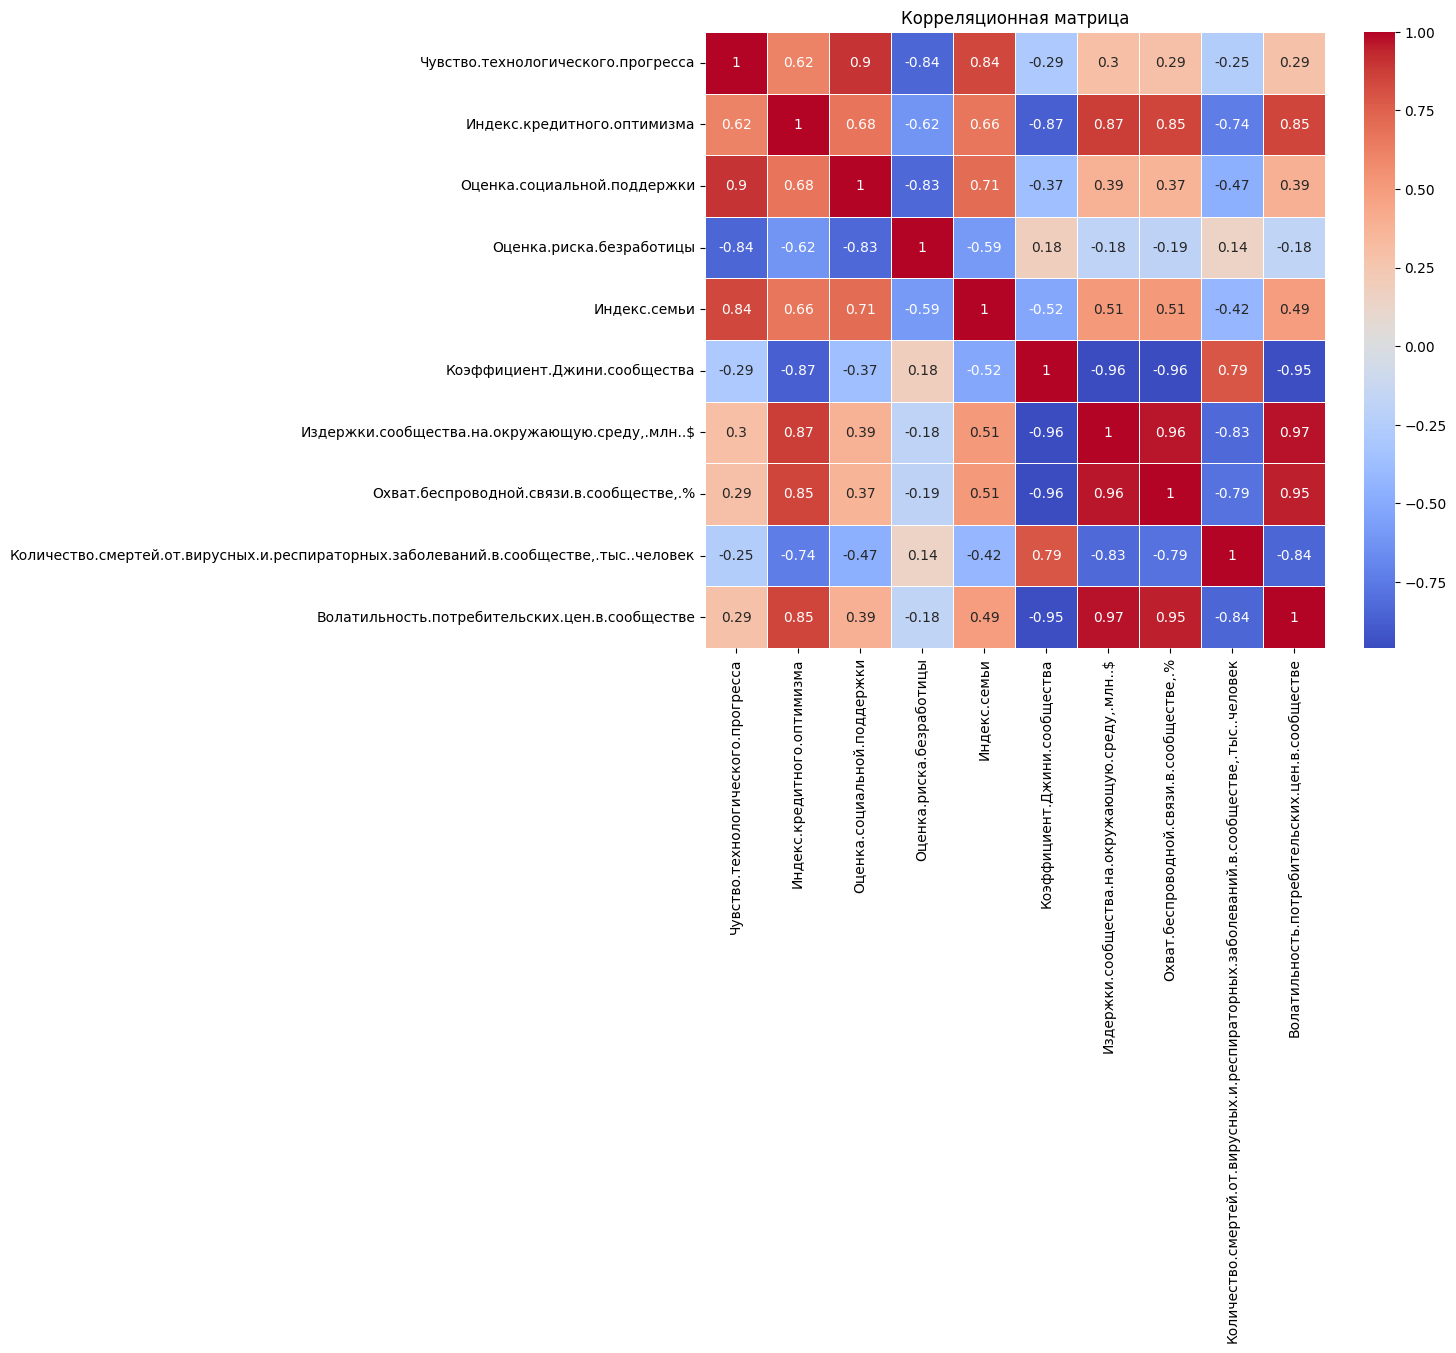

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Создание тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Корреляционная матрица")
plt.show()


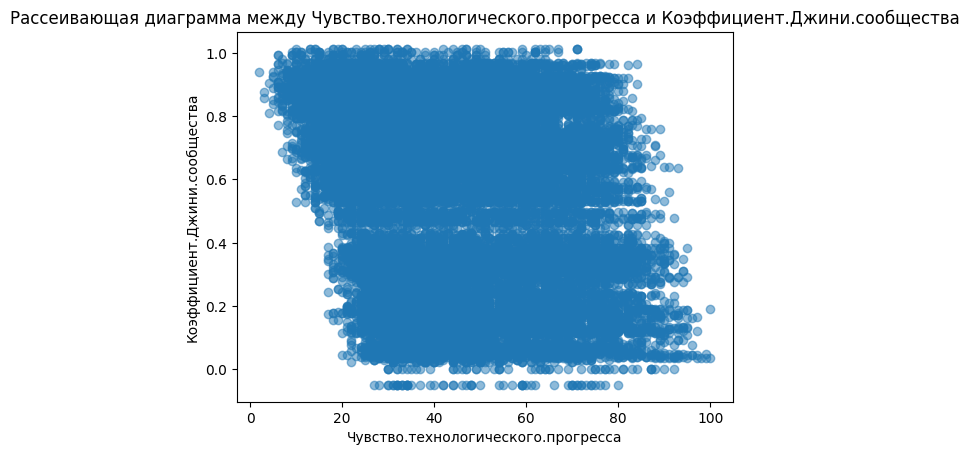

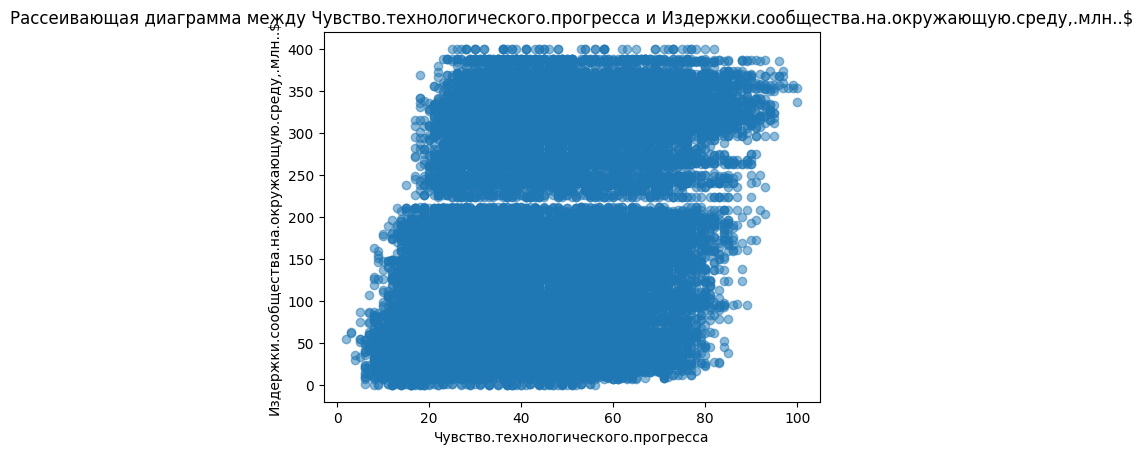

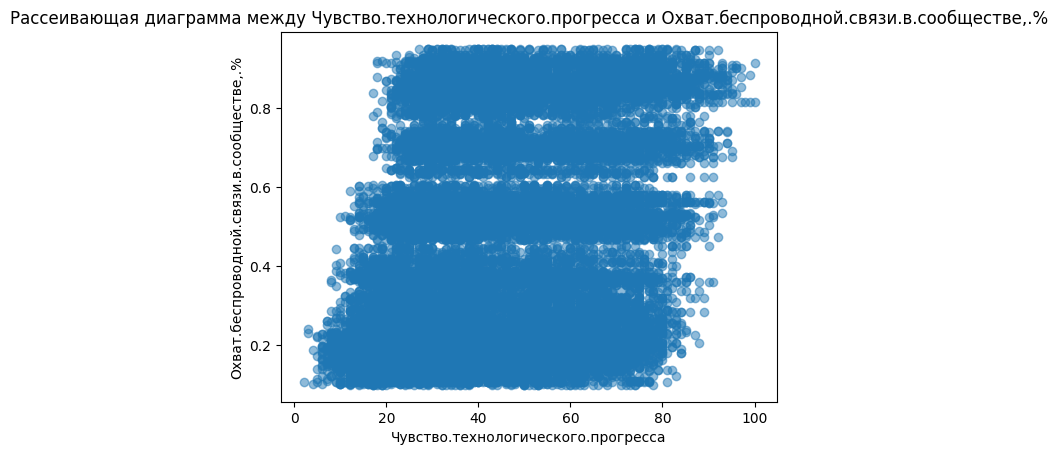

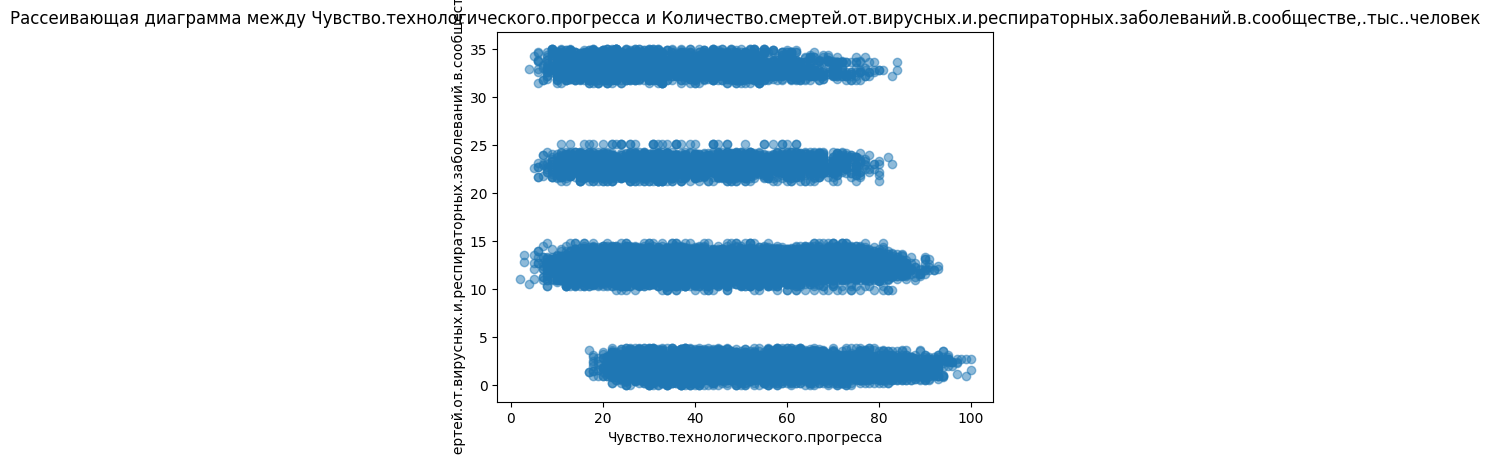

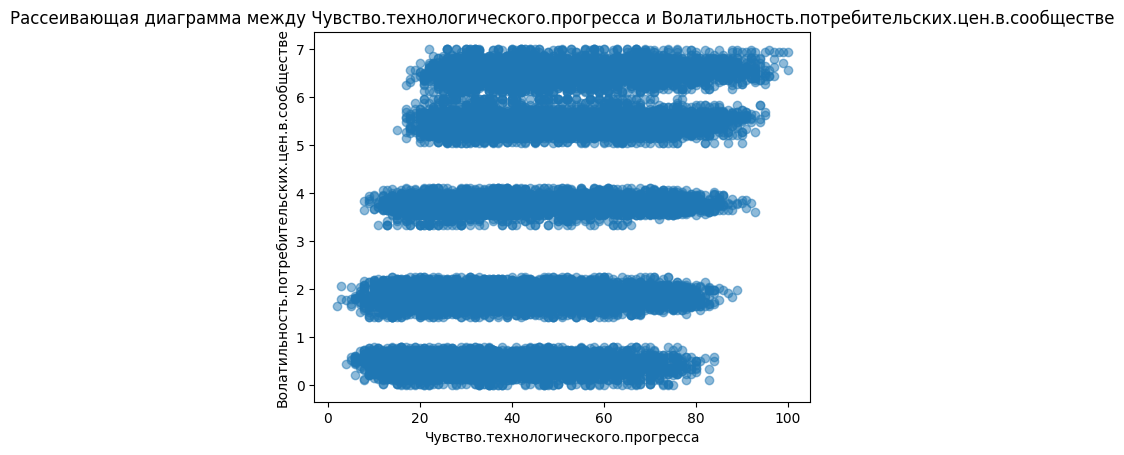

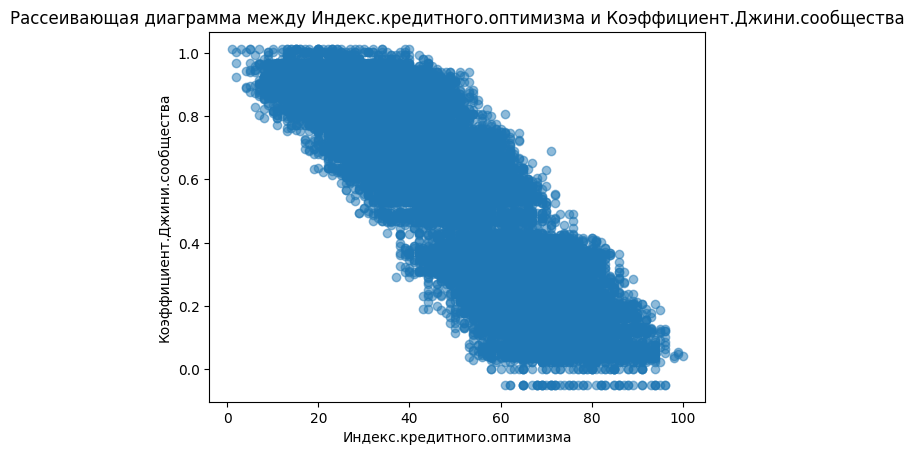

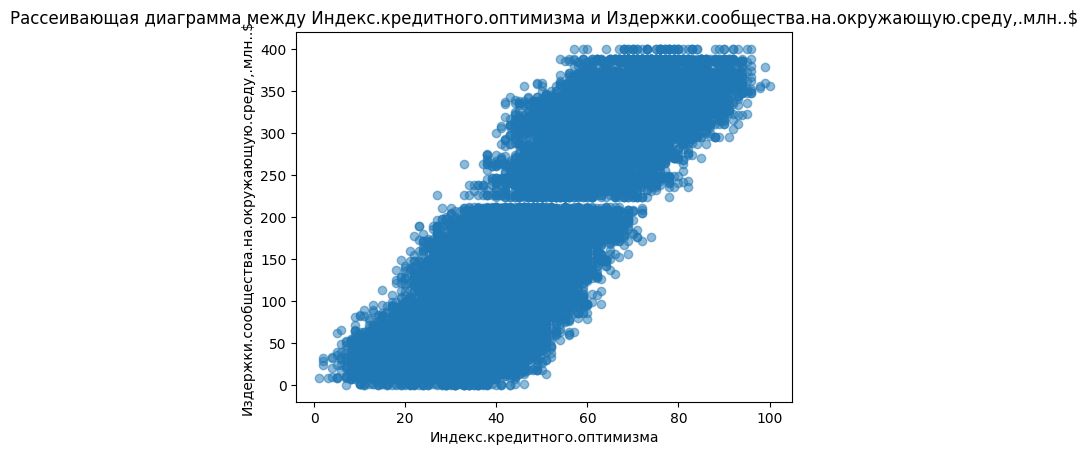

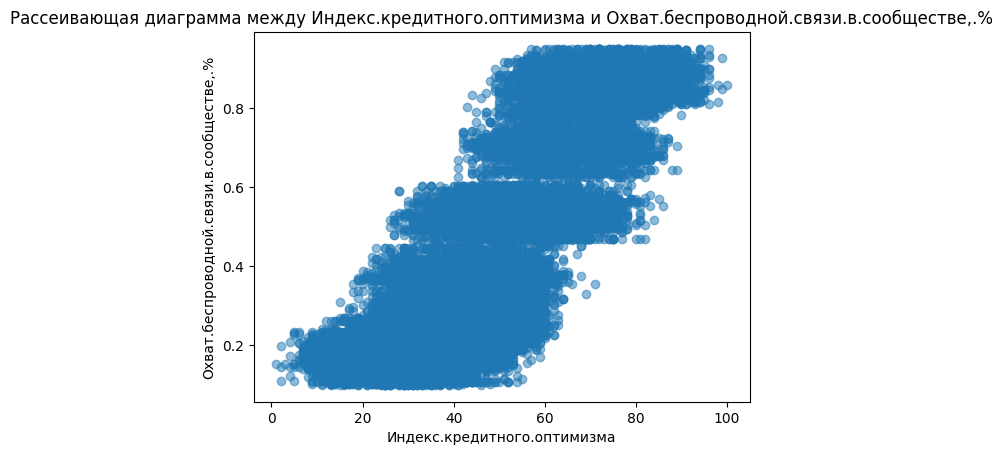

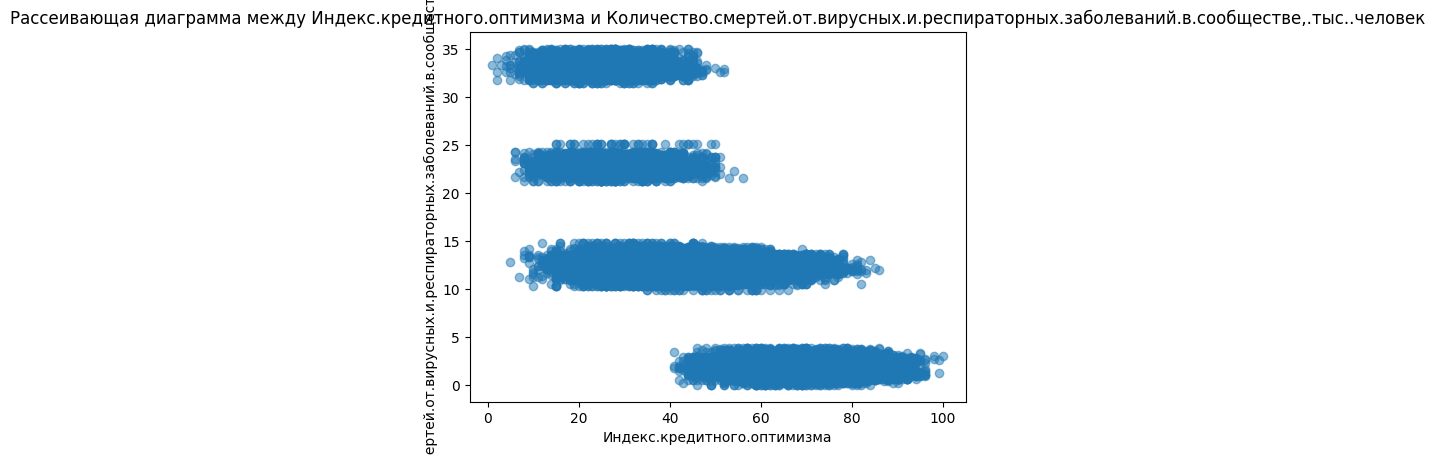

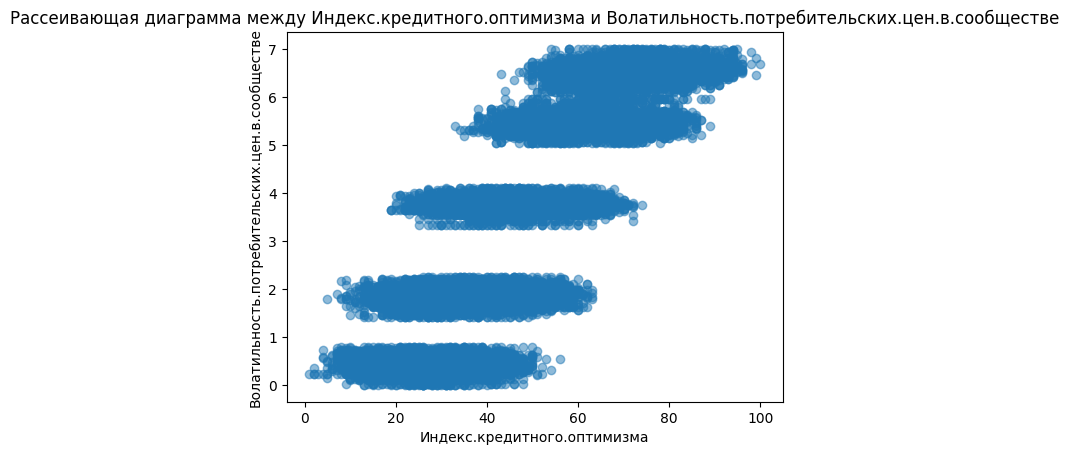

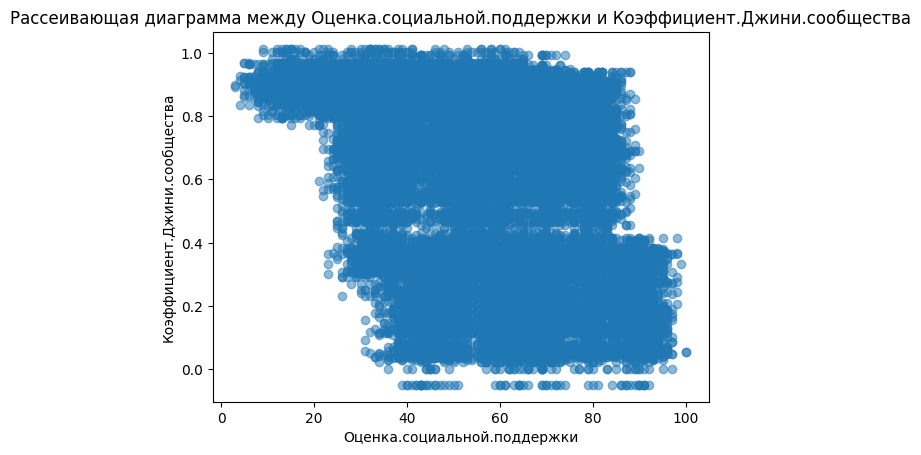

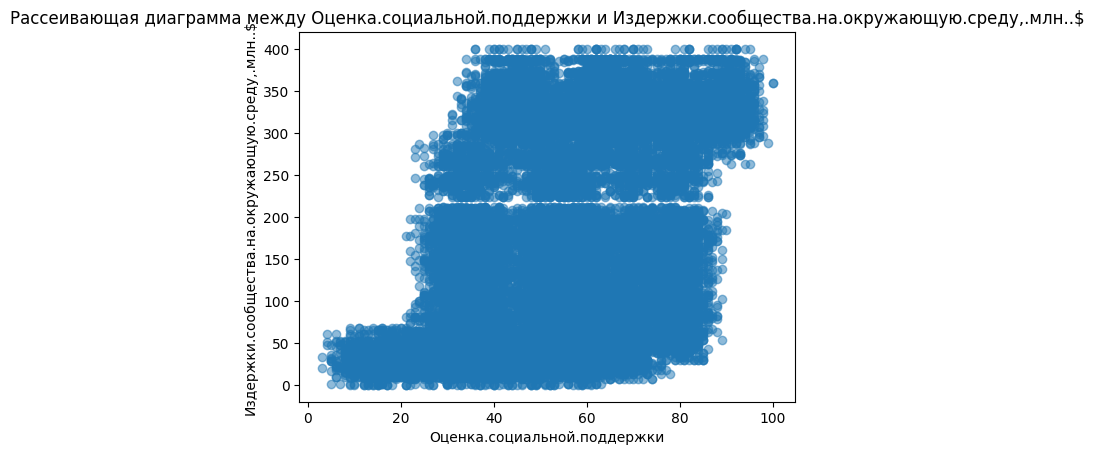

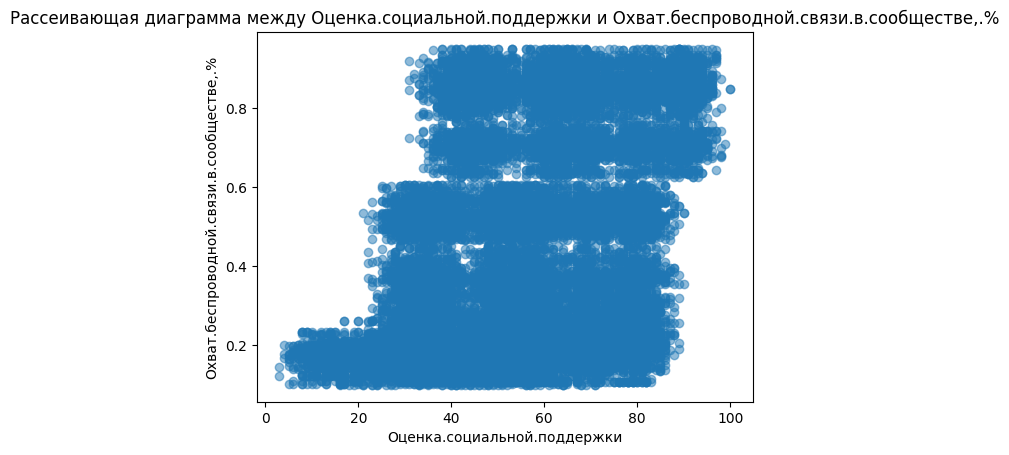

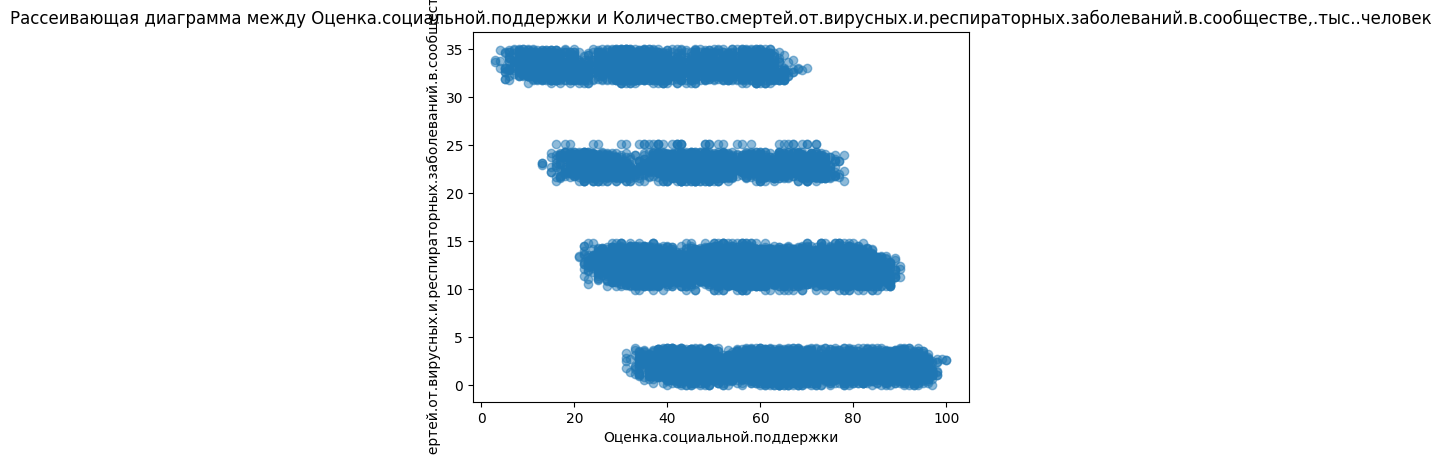

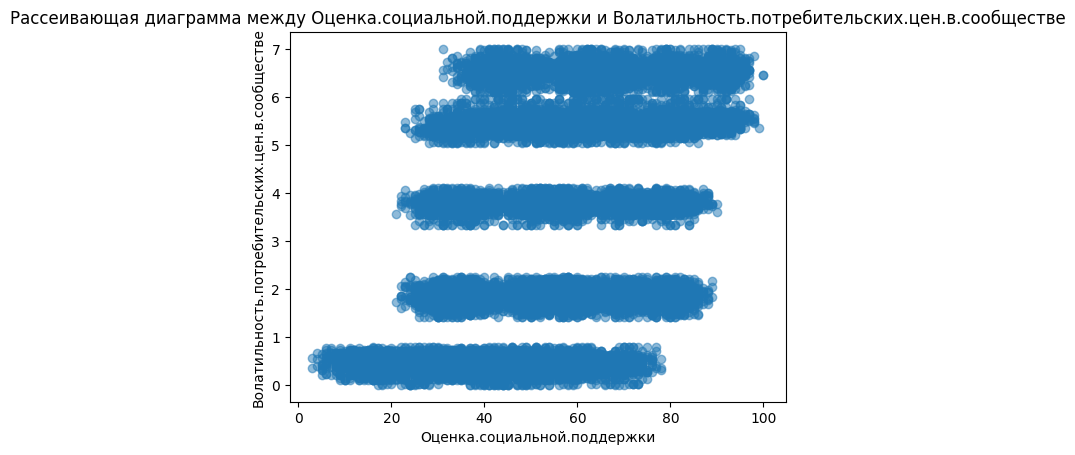

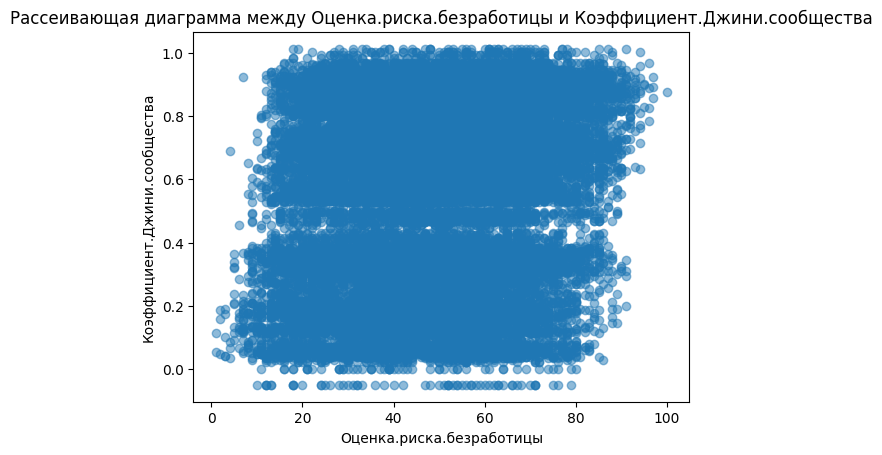

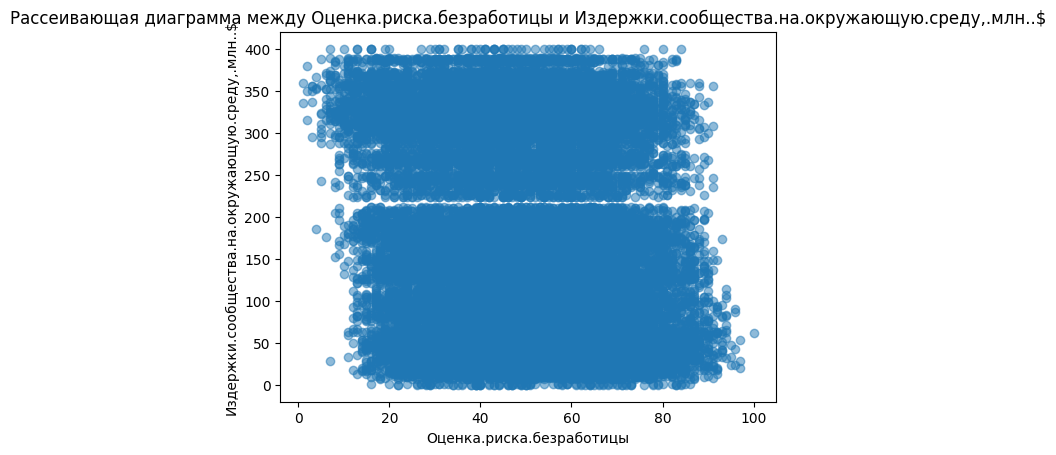

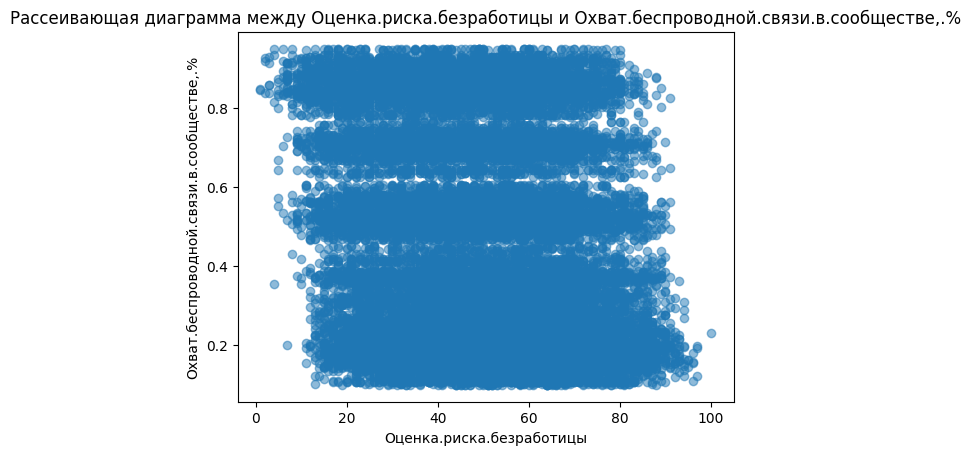

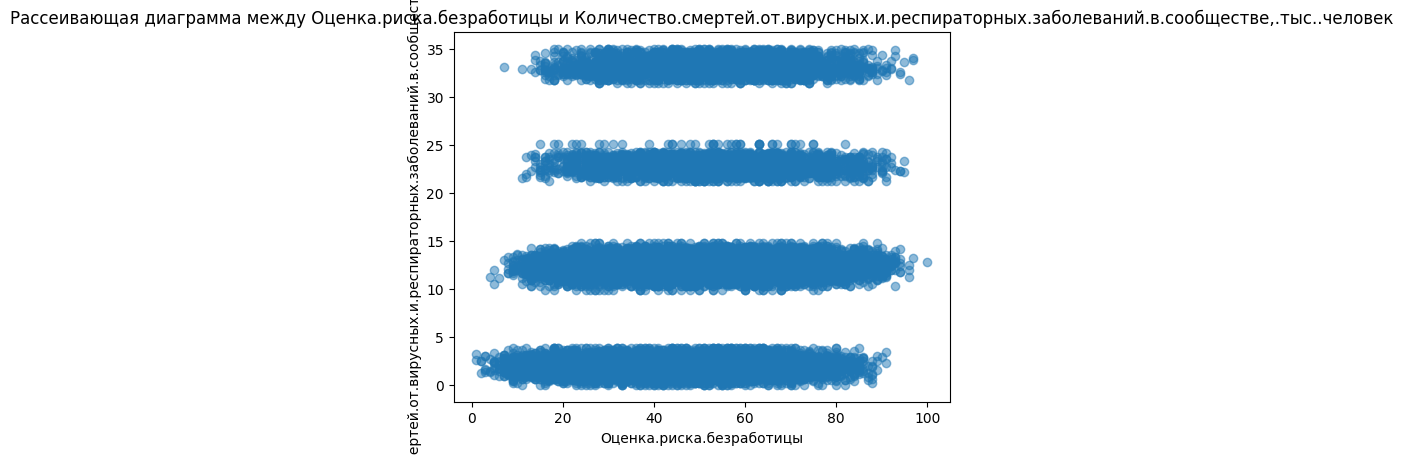

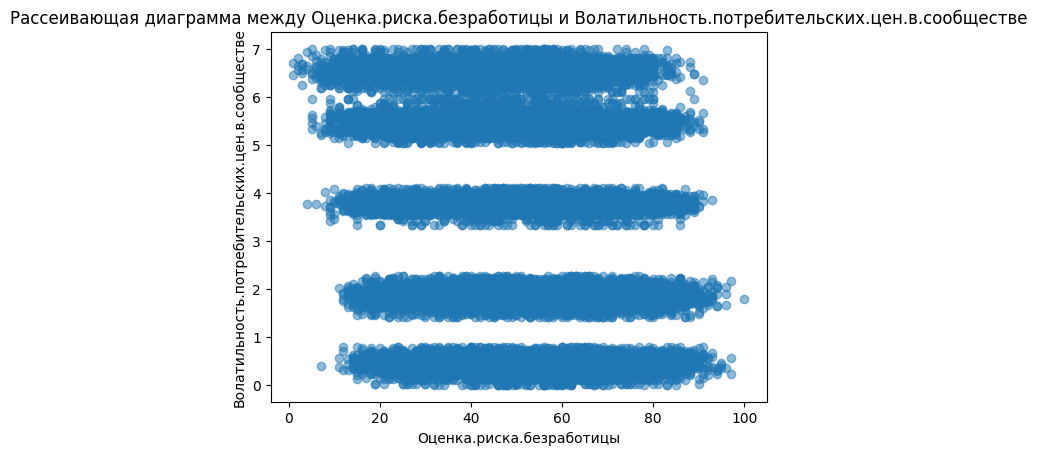

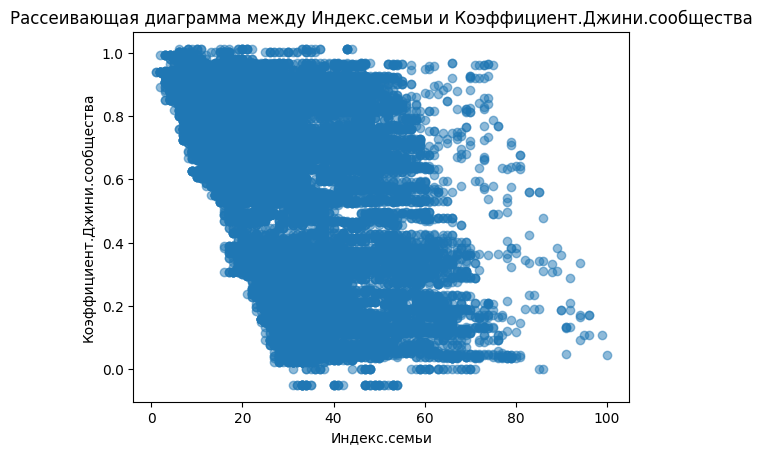

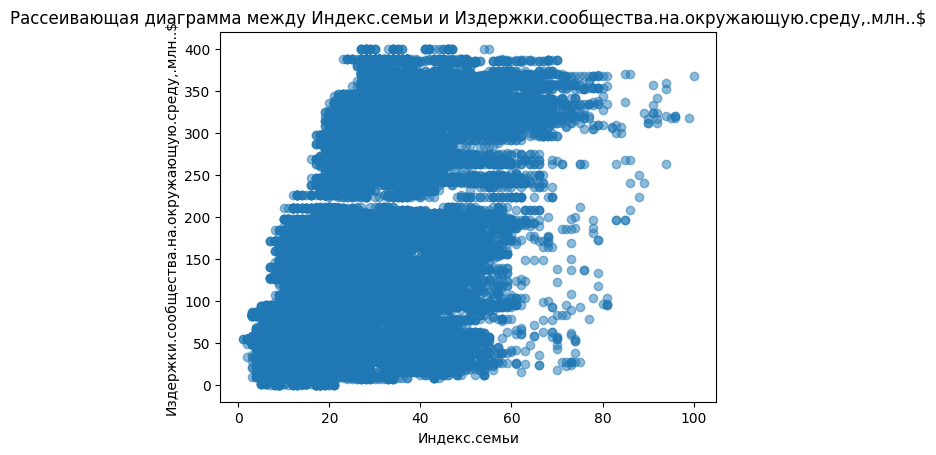

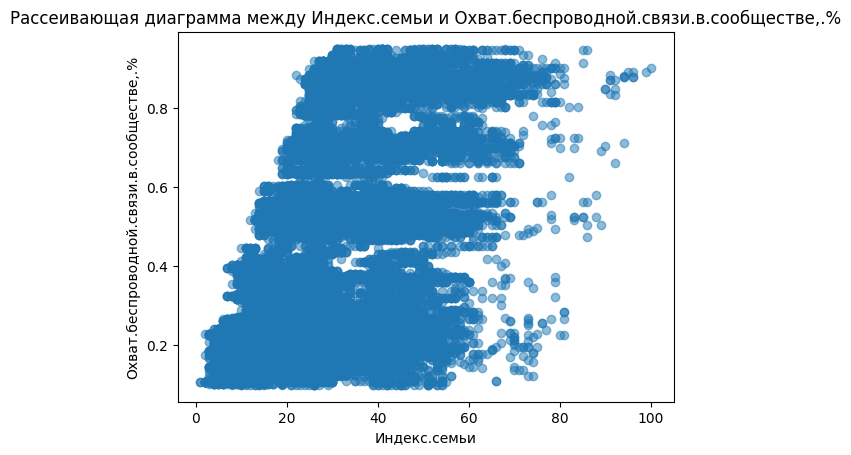

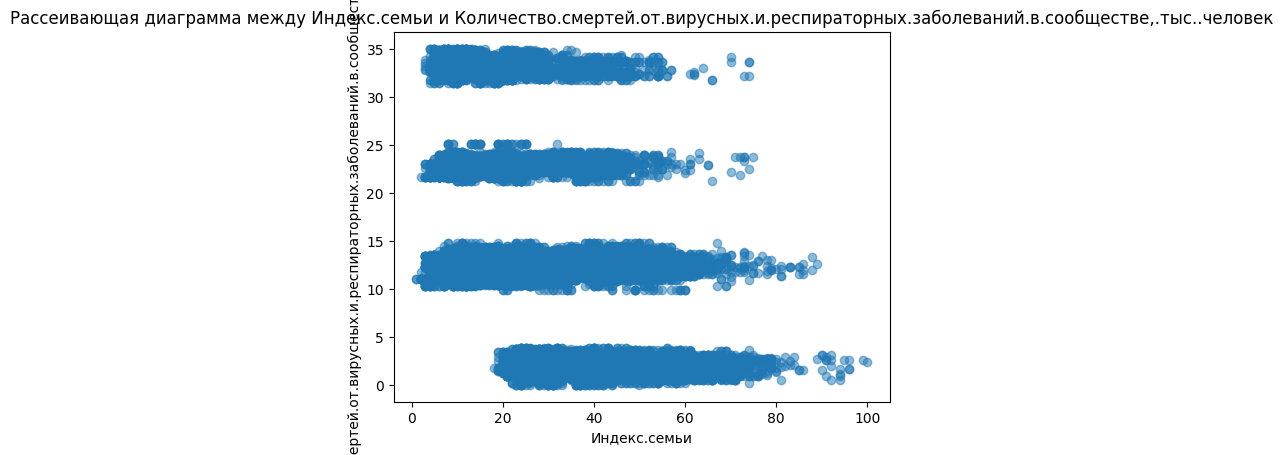

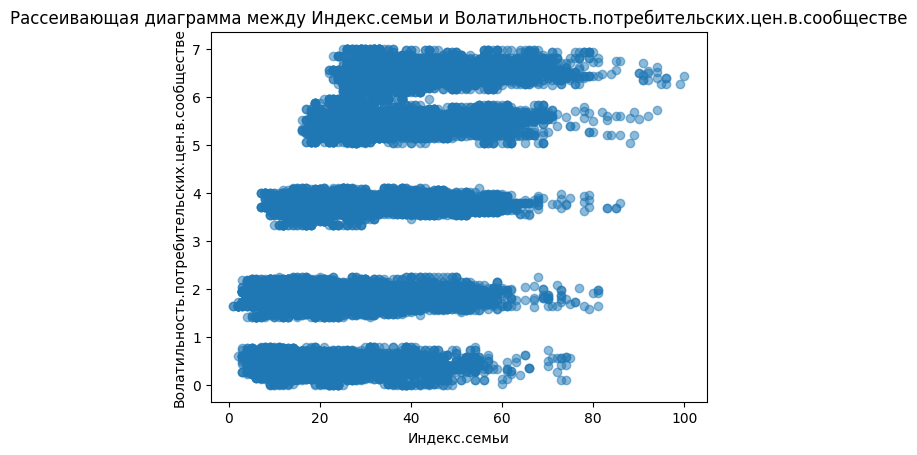

In [21]:
import matplotlib.pyplot as plt

for state_feature in features_state:
    for cause_feature in features_cause:
        plt.scatter(data[state_feature], data[cause_feature], alpha=0.5)
        plt.xlabel(state_feature)
        plt.ylabel(cause_feature)
        plt.title(f"Рассеивающая диаграмма между {state_feature} и {cause_feature}")
        plt.show()

In [37]:
# Удаление строк с пропущенными значениями
data_cleaned = data.dropna()

# Обновление индексов после удаления строк
data_cleaned.reset_index(drop=True, inplace=True)
data_cleaned

Респондент  Сообщество  Среднегодовой.доход,.тыс..$  \
0               0         423                       21.350   
1           11111          35                      622.613   
2           22222          63                      400.896   
3           29334         566                      375.950   
4           30445         257                      925.782   
...           ...         ...                          ...   
29995       28883         390                      458.691   
29996       28884         519                      418.492   
29997       28885         243                      412.715   
29998       28887         258                      374.882   
29999       28892         527                      264.142   

       Объем.потребленного.алкоголя.в.год,.л.  Количество.членов.семьи  \
0                                          62                        4   
1                                          30                        7   
2                                          45                        2   
3                                          56                        5   
4                                          39                        6   
...                                       ...                      ...   
29995                                      47                        1   
29996                                      54                        2   
29997                                      46                        3   
29998                                      38                        1   
29999                                      49                        1   

       Количество.лет.образования  \
0                               5   
1                              21   
2                               8   
3                              10   
4                              18   
...                           ...   
29995                          14   
29996                          11   
29997                          11   
29998                          18   
29999                          15   

       Доля.от.дохода.семьи.которая.тратится.на.продовольствие,.%  \
0                                                     65            
1                                                     39            
2                                                     45            
3                                                     68            
4                                                     38            
...                                                  ...            
29995                                                 50            
29996                                                 47            
29997                                                 50            
29998                                                 39            
29999                                                 45            

       Коэффициент.Джини.сообщества  \
0                          0.608084   
1                          0.369140   
2                          0.345094   
3                          0.635868   
4                          0.787911   
...                             ...   
29995                      0.356139   
29996                      0.841676   
29997                      0.921816   
29998                      0.498873   
29999                      0.561213   

       Издержки.сообщества.на.окружающую.среду,.млн..$  \
0                                               197.16   
1                                               297.10   
2                                               305.32   
3                                                78.78   
4                                                93.35   
...                                                ...   
29995                                           260.35   
29996                                            21.94   
29997                                            59.51   
29998                                           20

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Определение признаков для обучения модели
features_all = features_state + features_cause

# Удаление строк с пропущенными значениями в целевой переменной
data_filled = data_cleaned.dropna(subset=['Ощущаемое.счастье'])

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(data_filled[features_all], data_filled['Ощущаемое.счастье'], test_size=0.2, random_state=42)

# Создание и обучение модели
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Предсказание значений для респондентов с неизвестной характеристикой счастья
predicted_happiness_unknown = model.predict(data_cleaned[data_cleaned['Ощущаемое.счастье'].isnull()][features_all])

# Добавление предсказанных значений в исходные данные
data_cleaned.loc[data_cleaned['Ощущаемое.счастье'].isnull(), 'Ощущаемое.счастье'] = predicted_happiness_unknown

ValueError: Found array with 0 sample(s) (shape=(0, 10)) while a minimum of 1 is required by RandomForestClassifier.

In [11]:
# Удаление строк с пропущенными значениями в 'Метка счастья'
data_cleaned = data.dropna(subset=['Ощущаемое.счастье'])
data_cleaned

Респондент  Сообщество  Среднегодовой.доход,.тыс..$  \
0               0         423                       21.350   
1           11111          35                      622.613   
2           22222          63                      400.896   
3           29334         566                      375.950   
4           30445         257                      925.782   
...           ...         ...                          ...   
35993       28883         390                      458.691   
35994       28884         519                      418.492   
35995       28885         243                      412.715   
35997       28887         258                      374.882   
35999       28892         527                      264.142   

       Объем.потребленного.алкоголя.в.год,.л.  Количество.членов.семьи  \
0                                          62                        4   
1                                          30                        7   
2                                          45                        2   
3                                          56                        5   
4                                          39                        6   
...                                       ...                      ...   
35993                                      47                        1   
35994                                      54                        2   
35995                                      46                        3   
35997                                      38                        1   
35999                                      49                        1   

       Количество.лет.образования  \
0                               5   
1                              21   
2                               8   
3                              10   
4                              18   
...                           ...   
35993                          14   
35994                          11   
35995                          11   
35997                          18   
35999                          15   

       Доля.от.дохода.семьи.которая.тратится.на.продовольствие,.%  \
0                                                     65            
1                                                     39            
2                                                     45            
3                                                     68            
4                                                     38            
...                                                  ...            
35993                                                 50            
35994                                                 47            
35995                                                 50            
35997                                                 39            
35999                                                 45            

       Коэффициент.Джини.сообщества  \
0                          0.608084   
1                          0.369140   
2                          0.345094   
3                          0.635868   
4                          0.787911   
...                             ...   
35993                      0.356139   
35994                      0.841676   
35995                      0.921816   
35997                      0.498873   
35999                      0.561213   

       Издержки.сообщества.на.окружающую.среду,.млн..$  \
0                                               197.16   
1                                               297.10   
2                                               305.32   
3                                                78.78   
4                                                93.35   
...                                                ...   
35993                                           260.35   
35994                                            21.94   
35995                                            59.51   
35997                                           20

In [12]:
# Разделение на признаки и целевую переменную
features = data_cleaned.drop(['Ощущаемое.счастье'], axis=1)
target = data_cleaned['Ощущаемое.счастье']

In [13]:
features

Респондент  Сообщество  Среднегодовой.доход,.тыс..$  \
0               0         423                       21.350   
1           11111          35                      622.613   
2           22222          63                      400.896   
3           29334         566                      375.950   
4           30445         257                      925.782   
...           ...         ...                          ...   
35993       28883         390                      458.691   
35994       28884         519                      418.492   
35995       28885         243                      412.715   
35997       28887         258                      374.882   
35999       28892         527                      264.142   

       Объем.потребленного.алкоголя.в.год,.л.  Количество.членов.семьи  \
0                                          62                        4   
1                                          30                        7   
2                                          45                        2   
3                                          56                        5   
4                                          39                        6   
...                                       ...                      ...   
35993                                      47                        1   
35994                                      54                        2   
35995                                      46                        3   
35997                                      38                        1   
35999                                      49                        1   

       Количество.лет.образования  \
0                               5   
1                              21   
2                               8   
3                              10   
4                              18   
...                           ...   
35993                          14   
35994                          11   
35995                          11   
35997                          18   
35999                          15   

       Доля.от.дохода.семьи.которая.тратится.на.продовольствие,.%  \
0                                                     65            
1                                                     39            
2                                                     45            
3                                                     68            
4                                                     38            
...                                                  ...            
35993                                                 50            
35994                                                 47            
35995                                                 50            
35997                                                 39            
35999                                                 45            

       Коэффициент.Джини.сообщества  \
0                          0.608084   
1                          0.369140   
2                          0.345094   
3                          0.635868   
4                          0.787911   
...                             ...   
35993                      0.356139   
35994                      0.841676   
35995                      0.921816   
35997                      0.498873   
35999                      0.561213   

       Издержки.сообщества.на.окружающую.среду,.млн..$  \
0                                               197.16   
1                                               297.10   
2                                               305.32   
3                                                78.78   
4                                                93.35   
...                                                ...   
35993                                           260.35   
35994                                            21.94   
35995                                            59.51   
35997                                           20

In [14]:
target

0        1.0
1        7.0
2        5.0
3        1.0
4        7.0
        ... 
35993    5.0
35994    2.0
35995    2.0
35997    8.0
35999    5.0
Name: Ощущаемое.счастье, Length: 30000, dtype: float64

In [18]:
# Удаление строк с пропущенными значениями
data_cleaned = data_cleaned.dropna()

# Разделение на признаки и целевую переменную
features = data_cleaned.drop(['Ощущаемое.счастье'], axis=1)
target = data_cleaned['Ощущаемое.счастье']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Инициализация и обучение модели
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Выборка данных с неизвестной меткой счастья
unknown_data = data[data['Ощущаемое.счастье'].isnull()]
unknown_features = unknown_data.drop(['Ощущаемое.счастье'], axis=1)

# Предсказание меток счастья только для строк без пропусков
unknown_features_cleaned = unknown_features.dropna()
unknown_pred = model.predict(unknown_features_cleaned)

Mean Squared Error: 0.13600788333333333


ValueError: Found array with 0 sample(s) (shape=(0, 25)) while a minimum of 1 is required by RandomForestRegressor.

In [ ]:
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Признак': X_train.columns, 'Важность': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Важность', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Признак'], feature_importance_df['Важность'])
plt.xlabel('Важность')
plt.ylabel('Признак')
plt.title('Влияние признаков на Ощущаемое.счастье')
plt.show()

In [7]:
feature_importance_df

NameError: name 'feature_importance_df' is not defined

In [8]:
# Вычисляем матрицу корреляций между всеми признаками
correlation_matrix = data_cleaned.corr()

# Определите интересующие вас признаки состояния и причины
features_of_interest = ['Чувство.технологического.прогресса', 'Индекс.кредитного.оптимизма', 'Оценка.социальной.поддержки', 
                        'Оценка.риска.безработицы', 'Индекс.семьи', 'Коэффициент.Джини.сообщества', 'Издержки.сообщества.на.окружающую.среду,.млн..$', 
                            'Охват.беспроводной.связи.в.сообществе,.%', 'Количество.смертей.от.вирусных.и.респираторных.заболеваний.в.сообществе,.тыс..человек',
                           'Волатильность.потребительских.цен.в.сообществе']
# Замените ... на остальные признаки, которые вас интересуют

# Выбираем только интересующие признаки из матрицы корреляций
subset_correlation_matrix = correlation_matrix[features_of_interest].loc[features_of_interest]

# Создаем тепловую карту для визуализации
plt.figure(figsize=(12, 8))
sns.heatmap(subset_correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Тепловая карта корреляции признаков причины и наиболее важных признаков состояния')
plt.show()

NameError: name 'data_cleaned' is not defined

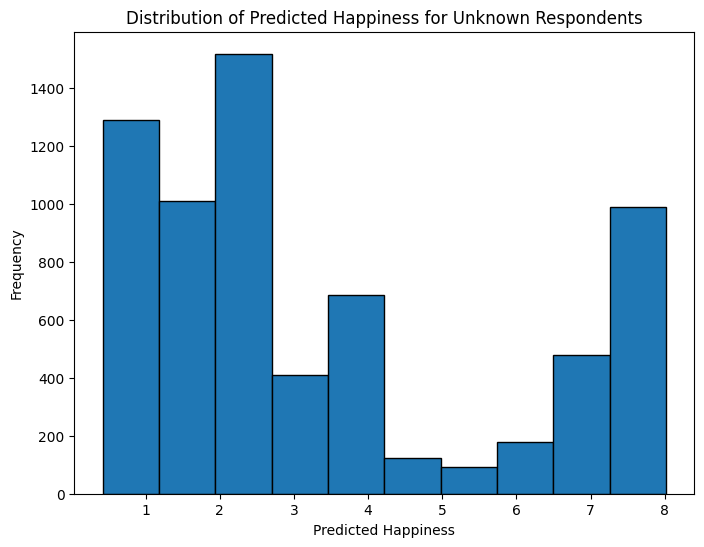

In [115]:
plt.figure(figsize=(8, 6))
plt.hist(unknown_pred, edgecolor='black')
plt.xlabel('Predicted Happiness')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Happiness for Unknown Respondents')
plt.show()

C:\Users\AlexB\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\AlexB\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\collections.py:1133: RuntimeWarning: invalid value encountered in sqrt
  size = np.sqrt(val)


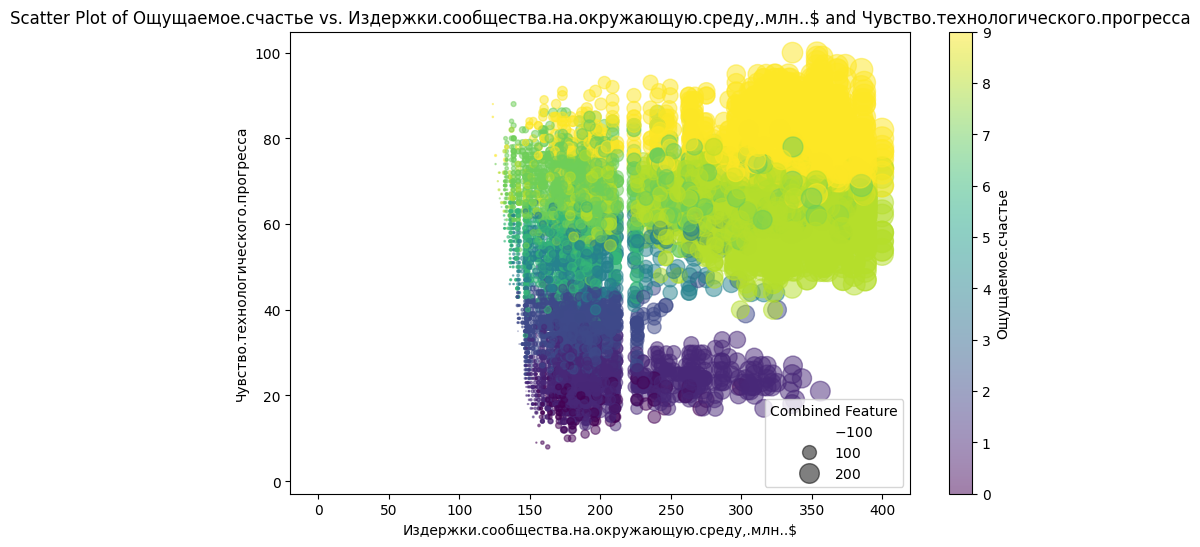

In [126]:
# Выбранные показатели
cause_feature = 'Издержки.сообщества.на.окружающую.среду,.млн..$'
state_feature = 'Чувство.технологического.прогресса'
happiness_label = 'Ощущаемое.счастье'

# Создаем scatter plot с использованием третьего показателя в качестве размера точек
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data_cleaned[cause_feature], data_cleaned[state_feature], c=data_cleaned[happiness_label], cmap='viridis', s=data_cleaned['Combined_Feature'], alpha=0.5)
plt.colorbar(label=happiness_label)
plt.xlabel(cause_feature)
plt.ylabel(state_feature)
plt.title(f'Scatter Plot of {happiness_label} vs. {cause_feature} and {state_feature}')
plt.legend(*scatter.legend_elements("sizes", num=5), title="Combined Feature")
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(data_cleaned, edgecolor='black')
plt.xlabel('Predicted Happiness')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Happiness for Unknown Respondents')
plt.show()